In [1]:
!pip install pandas

In [2]:
!pip install scikit-learn

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
df=pd.read_csv('dataset_for_analyst_assignment_20201120.csv')

In [7]:
df

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,21979,0.0,0.0,...,0.0,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21979,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21980,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21980,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21981,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21981,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21982,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [216]:
df.isna().sum().sum() #checking how many null values are present. We can remove the NaN value .

227540

In [8]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
21978    False
21979    False
21980    False
21981    False
21982    False
Length: 21983, dtype: bool


In [9]:
df.drop_duplicates(inplace = True)

In [206]:
#lets check only 5 columns. We can see that there are several NaN values which are not useful for us. When inpecting in more detail we can see that a colums called'PREFERRED_RESTAURANT_TYPES' have only NaN value and so is not useful.
#As such we can remove that column

In [190]:
df.tail()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
USER_ID,,,,,,,,,,,,,,,,,,,,,
21979,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,0.0,0.0,1.0,...,android,0.0,0.0,1.0,False,12.0,2.0,NaN,NaN,1.383
21980,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
21981,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,android,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
21982,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ios,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
21983,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2019-10-01 00:00:00.000,2019-10-01 00:00:00.000,0.0,1.0,0.0,...,web,0.0,1.0,0.0,True,1.0,5.0,NaN,NaN,3.973


In [208]:
# We can use drop function to remove not required column.

In [11]:
to_drop=['PREFERRED_RESTAURANT_TYPES']
df.drop(to_drop, inplace=True, axis=1)

In [12]:
to_drop=['PURCHASE_COUNT_BY_STORE_TYPE']
df.drop(to_drop, inplace=True, axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21983 entries, 0 to 21982
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

In [212]:
#We can change the index of this data set as "USER_ID" is a unique identifier and we can select a row based on this id.

In [14]:
df['USER_ID'].is_unique

True

In [15]:
df = df.set_index('USER_ID')
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
USER_ID,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ios,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,0.0,1.0,0.0,...,android,0.0,0.0,1.0,False,23.0,2.0,NaN,NaN,6.853
3,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,0.0,4.0,1.0,...,android,0.0,19.0,0.0,True,21.0,2.0,9.0,3.0,6.559
4,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,android,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
5,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,android,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [16]:
df.dtypes.value_counts()

float64    20
object      5
int64       1
bool        1
dtype: int64

In [84]:
print("There are ",df['REGISTRATION_COUNTRY'].nunique(),"different countries where Wolt has been working")

There are  59 different countries where Wolt has been working


In [85]:
print("The countries are",df['REGISTRATION_COUNTRY'].unique())

The countries are ['DNK' 'FIN' 'GRC' 'LVA' 'ROU' 'FRA' 'CHN' 'ISL' 'POL' 'CZE' 'BRA' 'GBR'
 'NLD' 'SGP' 'IND' 'NOR' 'ARE' 'AUS' 'USA' 'JPN' 'DEU' 'ESP' 'TWN' 'ISR'
 'ITA' 'EST' 'RUS' 'SWE' 'IRL' 'CHE' 'LTU' 'CAN' 'AUT' 'AZE' 'TUR' 'UKR'
 'CYP' 'BEL' 'SVK' 'HUN' 'PAK' 'COL' 'HRV' 'PRT' 'KOR' 'PHL' 'SAU' 'FRO'
 'QAT' 'CHL' 'JOR' 'GEO' 'MEX' 'HKG' 'LBN' 'GIN' 'KWT' 'MLT' 'SVN']


In [17]:
df['REGISTRATION_COUNTRY'].value_counts()

FIN    10277
DNK     8081
GRC     3042
USA       70
GBR       54
SWE       45
EST       44
DEU       39
NOR       34
ITA       24
POL       23
LTU       22
ESP       19
CZE       14
HUN       11
AUS       11
BEL       11
FRA       11
NLD       10
ISR        9
RUS        8
IND        7
LVA        7
BRA        7
IRL        7
CYP        7
CAN        6
ARE        6
JPN        6
QAT        6
PRT        5
ROU        5
HRV        5
AUT        5
CHE        4
SGP        4
FRO        3
SVK        3
CHN        3
TUR        2
LBN        2
JOR        2
CHL        2
UKR        2
ISL        2
COL        2
AZE        2
KOR        1
PHL        1
SAU        1
PAK        1
TWN        1
GEO        1
MEX        1
HKG        1
GIN        1
KWT        1
MLT        1
SVN        1
Name: REGISTRATION_COUNTRY, dtype: int64

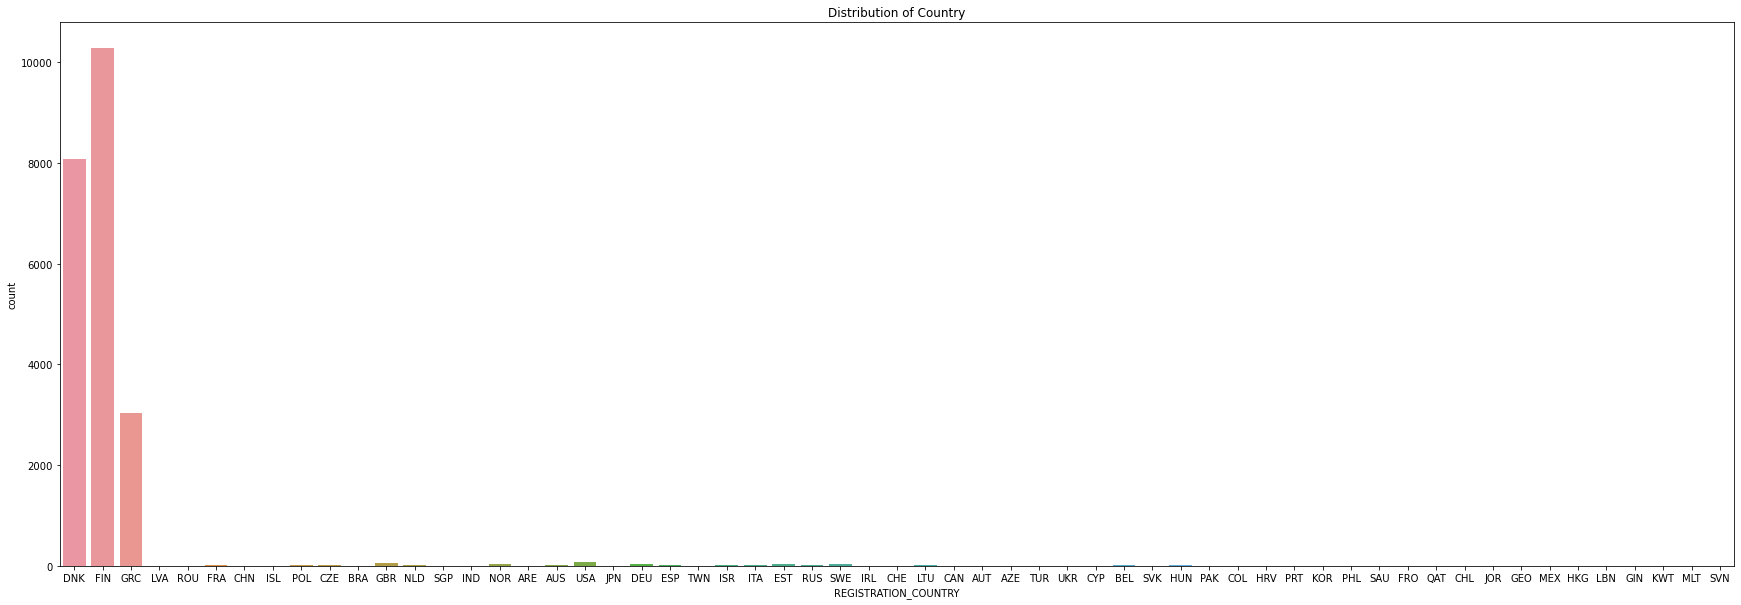

In [18]:
plt.figure(figsize=(30,10))
sns.countplot(x='REGISTRATION_COUNTRY', data=df);
plt.title('Distribution of Country');

Most of the Customers are from Finland,Denmark and Greece.

In [19]:
df['USER_HAS_VALID_PAYMENT_METHOD'].value_counts()

False    14415
True      7568
Name: USER_HAS_VALID_PAYMENT_METHOD, dtype: int64

In [20]:
df1=df.dropna() # Excluding the null values

In [21]:
df1

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
USER_ID,,,,,,,,,,,,,,,,,,,,,
3,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,0.0,4.0,1.0,...,android,0.0,19.0,0.0,True,21.0,2.0,9.0,3.0,6.559
13,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,0.0,8.0,0.0,...,ios,19.0,0.0,0.0,True,7.0,3.0,11.0,9.0,3.303
14,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,0.0,1.0,1.0,...,ios,0.0,0.0,2.0,False,5.0,6.0,19.0,19.0,1.382
16,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-05-18 00:00:00.000,2020-07-06 00:00:00.000,0.0,2.0,0.0,...,ios,2.0,0.0,0.0,False,0.0,1.0,49.0,49.0,4.619
17,2019-09-01 00:00:00.000,FIN,7,5.0,2.0,2019-12-05 00:00:00.000,2020-10-31 00:00:00.000,0.0,5.0,0.0,...,android,0.0,0.0,7.0,True,10.0,1.0,55.0,56.0,4.903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21967,2019-09-30 00:00:00.000,DNK,2,2.0,0.0,2020-07-17 00:00:00.000,2020-08-03 00:00:00.000,0.0,2.0,0.0,...,ios,2.0,0.0,0.0,False,0.0,7.0,17.0,17.0,2.281
21970,2019-09-30 00:00:00.000,FIN,6,6.0,0.0,2019-10-07 00:00:00.000,2020-06-02 00:00:00.000,0.0,2.0,3.0,...,android,0.0,0.0,6.0,True,0.0,7.0,48.0,1.0,3.320
21972,2019-09-30 00:00:00.000,GRC,25,25.0,0.0,2019-10-06 00:00:00.000,2020-10-22 00:00:00.000,0.0,6.0,10.0,...,android,0.0,0.0,25.0,True,11.0,5.0,16.0,9.0,2.753


In [22]:
df1.dtypes

REGISTRATION_DATE                           object
REGISTRATION_COUNTRY                        object
PURCHASE_COUNT                               int64
PURCHASE_COUNT_DELIVERY                    float64
PURCHASE_COUNT_TAKEAWAY                    float64
FIRST_PURCHASE_DAY                          object
LAST_PURCHASE_DAY                           object
BREAKFAST_PURCHASES                        float64
LUNCH_PURCHASES                            float64
EVENING_PURCHASES                          float64
DINNER_PURCHASES                           float64
LATE_NIGHT_PURCHASES                       float64
TOTAL_PURCHASES_EUR                        float64
DISTINCT_PURCHASE_VENUE_COUNT              float64
MIN_PURCHASE_VALUE_EUR                     float64
MAX_PURCHASE_VALUE_EUR                     float64
AVG_PURCHASE_VALUE_EUR                     float64
PREFERRED_DEVICE                            object
IOS_PURCHASES                              float64
WEB_PURCHASES                  

In [24]:
df_time = df1[['BREAKFAST_PURCHASES','LUNCH_PURCHASES','EVENING_PURCHASES','DINNER_PURCHASES','LATE_NIGHT_PURCHASES']]

In [27]:
df_time

,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES
USER_ID,,,,,
3,0.0,4.0,1.0,14.0,0.0
13,0.0,8.0,0.0,11.0,0.0
14,0.0,1.0,1.0,0.0,0.0
16,0.0,2.0,0.0,0.0,0.0
17,0.0,5.0,0.0,2.0,0.0
...,...,...,...,...,...
21967,0.0,2.0,0.0,0.0,0.0
21970,0.0,2.0,3.0,1.0,0.0
21972,0.0,6.0,10.0,9.0,0.0


In [31]:
df_total=df[df_time['BREAKFAST_PURCHASES'].sum(),df_time['LUNCH_PURCHASES'].sum(),df_time['EVENING_PURCHASES'].sum(),df_time['DINNER_PURCHASES'].sum(),df_time['LATE_NIGHT_PURCHASES'].sum()]

In [32]:
df_total

[2207.0, 27014.0, 5544.0, 34171.0, 0.0]

In [39]:
dt=pd.DataFrame({'Time':['Breakfast','Lunch','Evening','Dinner','Late_Night'],
                'total_sale':[df_time['BREAKFAST_PURCHASES'].sum(),df_time['LUNCH_PURCHASES'].sum(),df_time['EVENING_PURCHASES'].sum(),df_time['DINNER_PURCHASES'].sum(),df_time['LATE_NIGHT_PURCHASES'].sum()]})

In [40]:
dt

,Time,total_sale
0,Breakfast,2207.0
1,Lunch,27014.0
2,Evening,5544.0
3,Dinner,34171.0
4,Late_Night,0.0


In [44]:
label=dt.Time
values=dt.total_sale

<function matplotlib.pyplot.show(close=None, block=None)>

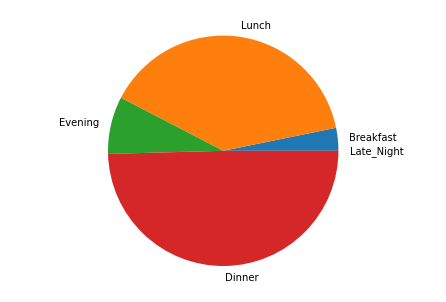

In [46]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(values,labels=label)
plt.show

In [50]:
df1.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
USER_ID,,,,,,,,,,,,,,,,,,,,,
3,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,0.0,4.0,1.0,...,android,0.0,19.0,0.0,True,21.0,2.0,9.0,3.0,6.559
13,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,0.0,8.0,0.0,...,ios,19.0,0.0,0.0,True,7.0,3.0,11.0,9.0,3.303
14,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,0.0,1.0,1.0,...,ios,0.0,0.0,2.0,False,5.0,6.0,19.0,19.0,1.382
16,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-05-18 00:00:00.000,2020-07-06 00:00:00.000,0.0,2.0,0.0,...,ios,2.0,0.0,0.0,False,0.0,1.0,49.0,49.0,4.619
17,2019-09-01 00:00:00.000,FIN,7,5.0,2.0,2019-12-05 00:00:00.000,2020-10-31 00:00:00.000,0.0,5.0,0.0,...,android,0.0,0.0,7.0,True,10.0,1.0,55.0,56.0,4.903


In [ ]:
#Let's see which country is doing good in purchasing.

In [52]:
df_total_purchase=df1[['REGISTRATION_COUNTRY','PURCHASE_COUNT']]

In [68]:
df_aggregate=df_total_purchase.groupby(['REGISTRATION_COUNTRY']).sum()

In [70]:
df_aggregate

,PURCHASE_COUNT
REGISTRATION_COUNTRY,
ARE,2
CAN,5
CYP,3
CZE,45
DEU,2
DNK,26366
EST,82
FIN,32730
FRA,2


<AxesSubplot:xlabel='REGISTRATION_COUNTRY'>

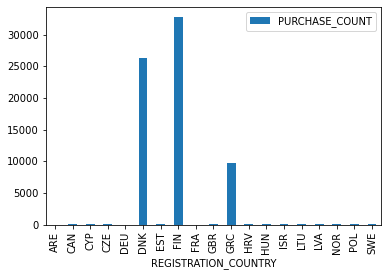

In [77]:


df_aggregate.plot(kind='bar')

In [86]:
#RFM table

In [94]:
df1['REGISTRATION_DATE'] = pd.to_datetime(df1['REGISTRATION_DATE'].str.strip())

df1['FIRST_PURCHASE_DAY'] = pd.to_datetime(df1['FIRST_PURCHASE_DAY'].str.strip())


C:\Users\sijan\AppData\Local\Temp\ipykernel_6992\1008551063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['REGISTRATION_DATE'] = pd.to_datetime(df1['REGISTRATION_DATE'].str.strip())
C:\Users\sijan\AppData\Local\Temp\ipykernel_6992\1008551063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FIRST_PURCHASE_DAY'] = pd.to_datetime(df1['FIRST_PURCHASE_DAY'].str.strip())


In [95]:
df1.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
USER_ID,,,,,,,,,,,,,,,,,,,,,
3,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,0.0,4.0,1.0,...,android,0.0,19.0,0.0,True,21.0,2.0,9.0,3.0,6.559
13,2019-09-01,FIN,19,19.0,0.0,2020-04-18,2020-10-27,0.0,8.0,0.0,...,ios,19.0,0.0,0.0,True,7.0,3.0,11.0,9.0,3.303
14,2019-09-01,FIN,2,2.0,0.0,2020-08-21,2020-09-09,0.0,1.0,1.0,...,ios,0.0,0.0,2.0,False,5.0,6.0,19.0,19.0,1.382
16,2019-09-01,FIN,2,2.0,0.0,2020-05-18,2020-07-06,0.0,2.0,0.0,...,ios,2.0,0.0,0.0,False,0.0,1.0,49.0,49.0,4.619
17,2019-09-01,FIN,7,5.0,2.0,2019-12-05,2020-10-31,0.0,5.0,0.0,...,android,0.0,0.0,7.0,True,10.0,1.0,55.0,56.0,4.903


In [108]:
import datetime as dt
NOW = dt.datetime(2023,2,20)
df1['recency']=pd.Timestamp.now().normalize()-df1[['LAST_PURCHASE_DAY']]

C:\Users\sijan\AppData\Local\Temp\ipykernel_6992\350466826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['recency']=pd.Timestamp.now().normalize()-df1[['LAST_PURCHASE_DAY']]


In [109]:
df1.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,recency
USER_ID,,,,,,,,,,,,,,,,,,,,,
3,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,0.0,4.0,1.0,...,0.0,19.0,0.0,True,21.0,2.0,9.0,3.0,6.559,1001 days
13,2019-09-01,FIN,19,19.0,0.0,2020-04-18,2020-10-27,0.0,8.0,0.0,...,19.0,0.0,0.0,True,7.0,3.0,11.0,9.0,3.303,846 days
14,2019-09-01,FIN,2,2.0,0.0,2020-08-21,2020-09-09,0.0,1.0,1.0,...,0.0,0.0,2.0,False,5.0,6.0,19.0,19.0,1.382,894 days
16,2019-09-01,FIN,2,2.0,0.0,2020-05-18,2020-07-06,0.0,2.0,0.0,...,2.0,0.0,0.0,False,0.0,1.0,49.0,49.0,4.619,959 days
17,2019-09-01,FIN,7,5.0,2.0,2019-12-05,2020-10-31,0.0,5.0,0.0,...,0.0,0.0,7.0,True,10.0,1.0,55.0,56.0,4.903,842 days


In [132]:
df1['recency']= df1['recency'].dt.days

C:\Users\sijan\AppData\Local\Temp\ipykernel_6992\1310908760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['recency']= df1['recency'].dt.days


In [142]:
df_rfm=df1[['REGISTRATION_COUNTRY','recency','PURCHASE_COUNT','TOTAL_PURCHASES_EUR']]

In [143]:
df_rfm

,REGISTRATION_COUNTRY,recency,PURCHASE_COUNT,TOTAL_PURCHASES_EUR
USER_ID,,,,
3,DNK,1001,19,631.488
13,FIN,846,19,587.972
14,FIN,894,2,118.404
16,FIN,959,2,107.272
17,FIN,842,7,284.372
...,...,...,...,...
21967,DNK,931,2,95.128
21970,FIN,993,6,115.368
21972,GRC,851,25,247.940


In [144]:
df_rfm.rename(columns={'REGISTRATION_COUNTRY':'country',
                       'recency': 'recency', 
                         'PURCHASE_COUNT': 'frequency', 
                         'TOTAL_PURCHASES_EUR': 'monetary_value'}, inplace=True)

C:\Users\sijan\AppData\Local\Temp\ipykernel_6992\3998820598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm.rename(columns={'REGISTRATION_COUNTRY':'country',


In [145]:
df_rfm.dtypes

country            object
recency             int64
frequency           int64
monetary_value    float64
dtype: object

In [146]:
df_rfm

,country,recency,frequency,monetary_value
USER_ID,,,,
3,DNK,1001,19,631.488
13,FIN,846,19,587.972
14,FIN,894,2,118.404
16,FIN,959,2,107.272
17,FIN,842,7,284.372
...,...,...,...,...
21967,DNK,931,2,95.128
21970,FIN,993,6,115.368
21972,GRC,851,25,247.940


In [156]:
df_rfm['cost_per_order']=df_rfm['monetary_value']/df_rfm['frequency']

C:\Users\sijan\AppData\Local\Temp\ipykernel_6992\3953016084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['cost_per_order']=df_rfm['monetary_value']/df_rfm['frequency']


In [157]:
df_rfm['frequency'].max()

320

In [158]:
frequent_buyer=df_rfm[df_rfm['frequency']==320]

In [168]:
df_rfm.sort_values(by=['recency'], ascending=True)

,country,recency,frequency,monetary_value,cost_per_order
USER_ID,,,,,
15800,FIN,842,14,536.360,38.311429
5063,DNK,842,17,583.924,34.348471
13433,FIN,842,6,171.028,28.504667
13447,FIN,842,3,114.356,38.118667
1543,FIN,842,14,360.272,25.733714
...,...,...,...,...,...
592,GRC,1267,2,39.468,19.734000
741,DNK,1267,2,58.696,29.348000
270,GRC,1268,2,20.240,10.120000


In [159]:
frequent_buyer

,country,recency,frequency,monetary_value,cost_per_order
USER_ID,,,,,
80,GRC,1087,320,4335.408,13.54815


This Frequent buyer from Greece can be a good customer but we have to check recency and monetary value associated with it. cost_per_order is about 13 euro which is relatively low in compare to Finland and Denmark. This can be due to low value cost in Greece. As such, Greece can be next huge market for the delivery company. Now let's analyse the data in terms of  recency and frequency.

In [160]:
df_rfm['recency'].min()#minimum recency (The lowest recency, highest frequency and monetary amounts are our best customers.)

842

In [169]:
df_recent_buyer=df_rfm[df_rfm['recency']==842]
df_recent_buyer

,country,recency,frequency,monetary_value,cost_per_order
USER_ID,,,,,
17,FIN,842,7,284.372,40.624571
28,FIN,842,3,80.960,26.986667
127,DNK,842,21,704.352,33.540571
131,DNK,842,3,164.956,54.985333
154,DNK,842,4,268.180,67.045000
...,...,...,...,...,...
21720,GRC,842,38,375.452,9.880316
21749,FIN,842,23,548.504,23.848000
21873,DNK,842,26,976.580,37.560769


In [171]:
df_recent_buyer.sort_values(by=['frequency'], ascending=False)

,country,recency,frequency,monetary_value,cost_per_order
USER_ID,,,,,
3361,FIN,842,125,2459.160,19.673280
18316,DNK,842,111,3487.352,31.417586
1049,FIN,842,102,2143.416,21.013882
15528,FIN,842,96,2166.692,22.569708
5504,DNK,842,85,1875.236,22.061600
...,...,...,...,...,...
17758,DNK,842,2,74.888,37.444000
21283,FIN,842,2,75.900,37.950000
10809,DNK,842,2,75.900,37.950000


In [174]:
df_recent_buyer['country'].value_counts()

FIN    127
DNK    113
GRC     23
Name: country, dtype: int64

There are only 3 countries which  has receny 842 of which Finland is on the top followed by Denmark and Greece.The lowest recency, highest frequency and monetary amounts are our best customers.

In [ ]:
#Preferred devices used by customers. 

In [183]:
df_purchase_type=df1[['IOS_PURCHASES','WEB_PURCHASES','ANDROID_PURCHASES']]

In [184]:
df_purchase_type.head()

,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES
USER_ID,,,
3,0.0,19.0,0.0
13,19.0,0.0,0.0
14,0.0,0.0,2.0
16,2.0,0.0,0.0
17,0.0,0.0,7.0


In [186]:
dt_purchase=pd.DataFrame({'purchase_type':['ios','web','android'],
                'total_sale':[df_purchase_type['IOS_PURCHASES'].sum(),df_purchase_type['WEB_PURCHASES'].sum(),df_purchase_type['ANDROID_PURCHASES'].sum()]})

In [187]:
dt_purchase

,purchase_type,total_sale
0,ios,33011.0
1,web,11654.0
2,android,24519.0


<function matplotlib.pyplot.show(close=None, block=None)>

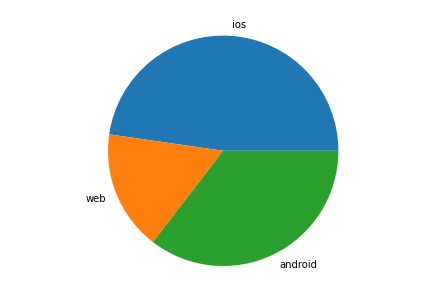

In [189]:
label=dt_purchase.purchase_type
values=dt_purchase.total_sale

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(values,labels=label)
plt.show

In [ ]:
#We can also check maximum delivery distance, minimum delivery distance and average delivery distance

In [191]:
df1['AVERAGE_DELIVERY_DISTANCE_KMS'].max()#Maximum delivery distance

11.997

In [192]:
df1['AVERAGE_DELIVERY_DISTANCE_KMS'].min()#Minimum delivery distance

0.002

In [194]:
df1['AVERAGE_DELIVERY_DISTANCE_KMS'].mean()#average delivery distance

5.951590390775155

Let's find out customer whose delivery distance is maximum:

In [195]:
far_buyer=df1[df1['AVERAGE_DELIVERY_DISTANCE_KMS']==11.997]
far_buyer

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,recency
USER_ID,,,,,,,,,,,,,,,,,,,,,
1361,2019-09-03,FIN,7,7.0,0.0,2020-01-08,2020-09-02,0.0,4.0,1.0,...,7.0,0.0,0.0,True,19.0,1.0,40.0,38.0,11.997,901


Let's find out customer whose delivery distance is minimum:

In [197]:
near_buyer=df1[df1['AVERAGE_DELIVERY_DISTANCE_KMS']==0.002]
near_buyer

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,recency
USER_ID,,,,,,,,,,,,,,,,,,,,,
15864,2019-09-21,FIN,16,16.0,0.0,2019-11-30,2020-10-17,0.0,5.0,5.0,...,0.0,0.0,16.0,True,13.0,4.0,21.0,8.0,0.002,856


In [201]:
df_Fin=df1[df1['REGISTRATION_COUNTRY']=='FIN']
df_Fin

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,recency
USER_ID,,,,,,,,,,,,,,,,,,,,,
13,2019-09-01,FIN,19,19.0,0.0,2020-04-18,2020-10-27,0.0,8.0,0.0,...,19.0,0.0,0.0,True,7.0,3.0,11.0,9.0,3.303,846
14,2019-09-01,FIN,2,2.0,0.0,2020-08-21,2020-09-09,0.0,1.0,1.0,...,0.0,0.0,2.0,False,5.0,6.0,19.0,19.0,1.382,894
16,2019-09-01,FIN,2,2.0,0.0,2020-05-18,2020-07-06,0.0,2.0,0.0,...,2.0,0.0,0.0,False,0.0,1.0,49.0,49.0,4.619,959
17,2019-09-01,FIN,7,5.0,2.0,2019-12-05,2020-10-31,0.0,5.0,0.0,...,0.0,0.0,7.0,True,10.0,1.0,55.0,56.0,4.903,842
22,2019-09-01,FIN,4,4.0,0.0,2019-10-27,2020-07-08,0.0,0.0,0.0,...,0.0,0.0,4.0,True,1.0,1.0,85.0,96.0,1.609,957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21932,2019-09-30,FIN,5,5.0,0.0,2019-10-11,2020-10-09,1.0,0.0,0.0,...,0.0,0.0,5.0,True,7.0,4.0,91.0,74.0,8.703,864
21942,2019-09-30,FIN,3,0.0,3.0,2019-10-01,2020-02-19,0.0,2.0,0.0,...,0.0,0.0,3.0,True,7.0,4.0,71.0,71.0,3.039,1097
21957,2019-09-30,FIN,5,5.0,0.0,2019-10-01,2020-05-11,0.0,2.0,0.0,...,5.0,0.0,0.0,False,17.0,2.0,56.0,46.0,0.192,1015


In [214]:
df_Fin_device=df_Fin['PREFERRED_DEVICE'].value_counts()
df_Fin_device

android    1662
ios        1346
web         566
Name: PREFERRED_DEVICE, dtype: int64

In [ ]:
#In Finland, most of people use android device to buy in wolt.

In [219]:
df_dormant=df[df['PURCHASE_COUNT']==0]

In [226]:
df_dormant


,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
USER_ID,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ios,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,android,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
5,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,android,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
6,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,android,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
7,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ios,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21975,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ios,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
21978,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,android,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
21980,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


There are huge number of customers who have not done a single purchase since there registration. Wolt has to market their products so that they can reach these customers. 

In [230]:
df_dormant['REGISTRATION_COUNTRY'].value_counts()

FIN    4826
DNK    3096
GRC    1510
USA      70
GBR      52
SWE      41
DEU      38
EST      31
ITA      24
NOR      21
LTU      20
ESP      19
POL      19
AUS      11
BEL      11
NLD      10
CZE      10
FRA       9
RUS       8
IND       7
BRA       7
IRL       7
QAT       6
HUN       6
CYP       6
JPN       6
ISR       6
PRT       5
ROU       5
CAN       5
AUT       5
ARE       5
CHE       4
LVA       4
SGP       4
HRV       4
FRO       3
CHN       3
SVK       3
UKR       2
LBN       2
JOR       2
CHL       2
TUR       2
AZE       2
ISL       2
COL       2
SAU       1
PHL       1
KOR       1
PAK       1
TWN       1
GEO       1
MEX       1
HKG       1
GIN       1
KWT       1
MLT       1
SVN       1
Name: REGISTRATION_COUNTRY, dtype: int64